In [14]:
# Dependencies for this notebook
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

# Ignore warning for this project
import warnings
warnings.filterwarnings("ignore")

# Exploration Phase Hills Dataset
The purpose of this notebook is to explore the dataset and getting to know what the particularities are. We will try to find duplications, missing values and outliers also the datatypes will be visualized. We start by loading one of the available datasets. You can switch datasets if desired by modifying `dataset_path`.

In [15]:
#dataset_path = "data/Lijn 1 laaste 12 maanden.csv"
#dataset_path = "data/Lijn 2 laatste 12 maanden.csv"
dataset_path = "data/Lijn 3 laatste 12 maanden.csv"

# Load the dataset
df = pd.read_csv(dataset_path)

# Print information about the dataset like column names, amount of rows and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13754 entries, 0 to 13753
Data columns (total 7 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   DateTime                                               13754 non-null  object 
 1   EL02_Process_Recipe_Working.MESQuality.Density_Max     13754 non-null  int64  
 2   EL02_Process_Recipe_Working.MESQuality.Density_Min     13754 non-null  int64  
 3   EL02_Process_Recipe_Working.MESQuality.Density_Target  13754 non-null  int64  
 4   EL02_Dry_Feed_Rate_PID.OUT                             13754 non-null  float64
 5   EL02_Dry_Feed_Rate_PID.PV                              13754 non-null  float64
 6   EL02_Dry_Feed_Rate_PID.SP                              13754 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 752.3+ KB


Some column names are prefixed with the production line number and some title. We would like to keep these generic over all datasets. The next block of code will rename these column names to a generic form. The datatypes are looking great and do not need to be transformed yet.

In [16]:
# Rename the column names to universal 
# names over the different datasets using this mapper
def column_mapper(column):
	parts = column.split('.')
	return parts[len(parts)-1]

# Rename the column names
df = df.rename(columns = column_mapper)

# Print the first 5 rows
df.head()

,DateTime,Density_Max,Density_Min,Density_Target,OUT,PV,SP
0,11/1/2022 12:08:02 PM,464,400,432,55.166412,8000.592285,8000
1,11/1/2022 12:23:02 PM,464,400,432,55.268192,7960.954590,8000
2,11/1/2022 12:38:02 PM,464,400,432,55.167942,7975.919922,8000
3,11/1/2022 12:53:02 PM,464,400,432,55.017338,8024.747070,8000
4,11/1/2022 1:08:02 PM,464,400,432,55.264465,8068.057129,8000


## Finding missing values
The next step is to find missing values we will search for these values using the `isna()` method.

In [17]:
#df.isna().sum()
df.isnull().sum()

DateTime          0
Density_Max       0
Density_Min       0
Density_Target    0
OUT               0
PV                0
SP                0
dtype: int64

## Finding outliers
We can use the describe() method to get more information about the numeric values in a dataframe. <br/>By comparing the min and max values with the mean of the Resting column we can say that the values are not evenly distributed and therfore need to be analysed futher.

In [18]:
# Converting the datetime column from str type to datetime type
df.DateTime = pd.to_datetime(df.DateTime, format='%m/%d/%Y %I:%M:%S %p')

# Describe table
df.describe()

,DateTime,Density_Max,Density_Min,Density_Target,OUT,PV,SP
count,13754,13754.000000,13754.000000,13754.000000,13754.000000,13754.000000,13754.000000
mean,2023-04-27 11:31:23.497746176,416.406573,344.145267,384.406573,56.931816,7729.250871,7728.319034
min,2022-11-01 12:08:02,352.000000,32.000000,320.000000,0.000000,4952.303711,5000.000000
25%,2023-01-20 08:41:47,376.000000,312.000000,344.000000,51.978379,6992.288574,7000.000000
50%,2023-04-19 23:15:32,408.000000,344.000000,376.000000,55.382156,7204.129639,7200.000000
75%,2023-08-03 19:49:17,416.000000,352.000000,384.000000,61.428075,8559.221436,8600.000000
max,2023-10-26 02:08:02,560.000000,496.000000,528.000000,80.000000,39643.585938,11000.000000
std,NaN,49.647833,71.869446,49.647833,8.539909,1104.093745,1069.315310


Text(0.5, 1.0, 'Dry_Feed_Rate_PID.OUT Outliers')

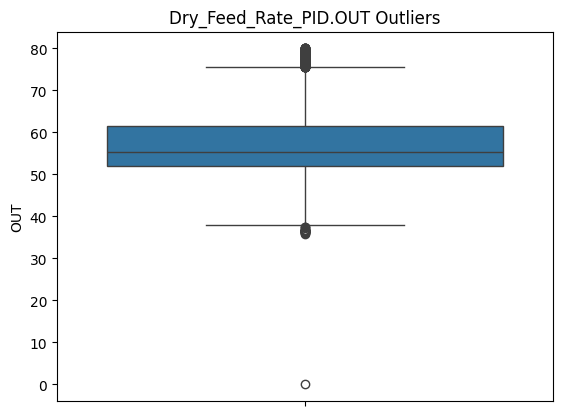

In [19]:
sns.boxplot(df["OUT"]).set_title("Dry_Feed_Rate_PID.OUT Outliers")

In [20]:
df[df["OUT"] < 1].head()

,DateTime,Density_Max,Density_Min,Density_Target,OUT,PV,SP
2165,2022-12-20 00:53:02,376,312,344,0.0,39643.585938,6500


Text(0.5, 1.0, 'Dry_Feed_Rate_PID.PV Outliers')

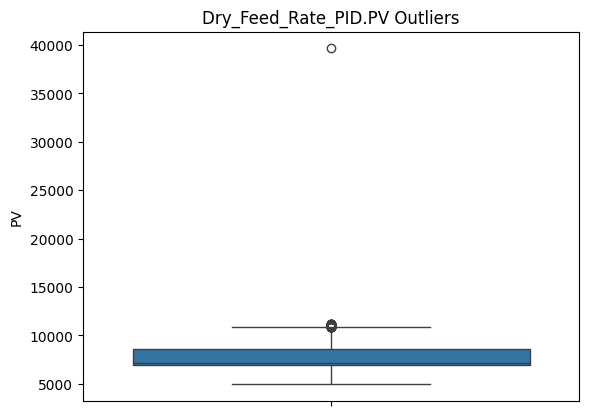

In [21]:
sns.boxplot(df["PV"]).set_title("Dry_Feed_Rate_PID.PV Outliers")

In [22]:
df[df["PV"] > 30000].head()

,DateTime,Density_Max,Density_Min,Density_Target,OUT,PV,SP
2165,2022-12-20 00:53:02,376,312,344,0.0,39643.585938,6500


<Axes: ylabel='Density_Target'>

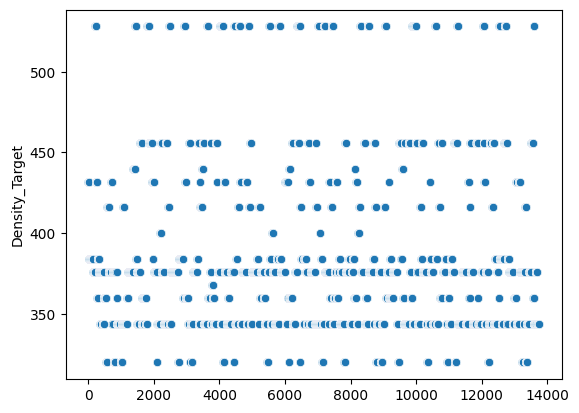

In [23]:
sns.scatterplot(df["Density_Target"])

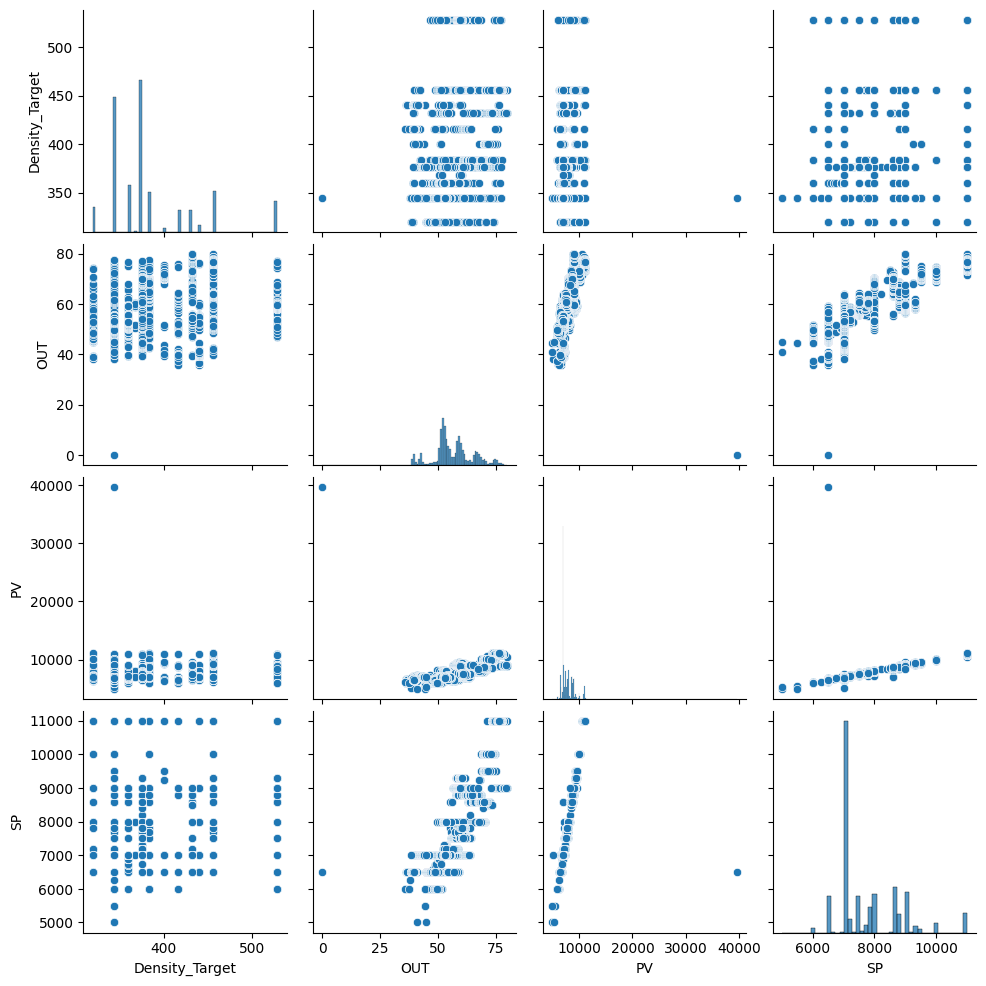

In [24]:

doi = df[['Density_Target','OUT','PV','SP']];
sns.pairplot(doi, kind="scatter")
plt.show()

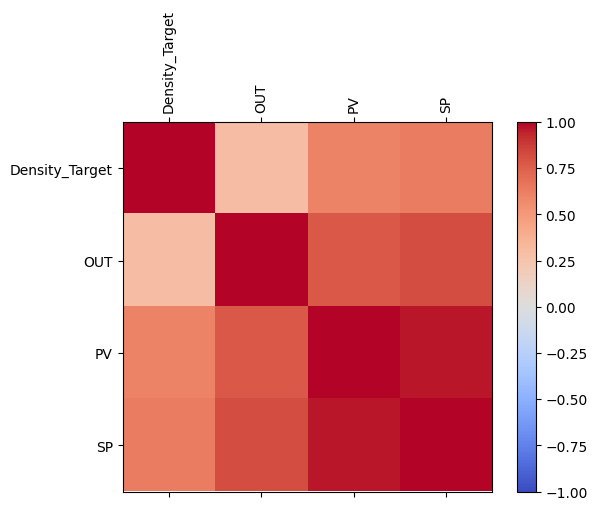

In [25]:
corr = doi.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(doi.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(doi.columns)
ax.set_yticklabels(doi.columns)
plt.show()

<Axes: xlabel='OUT', ylabel='SP'>

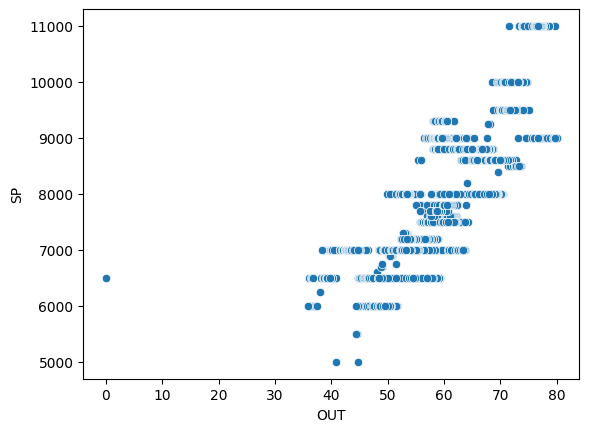

In [26]:
sns.scatterplot(data=df, x="OUT", y="SP" )

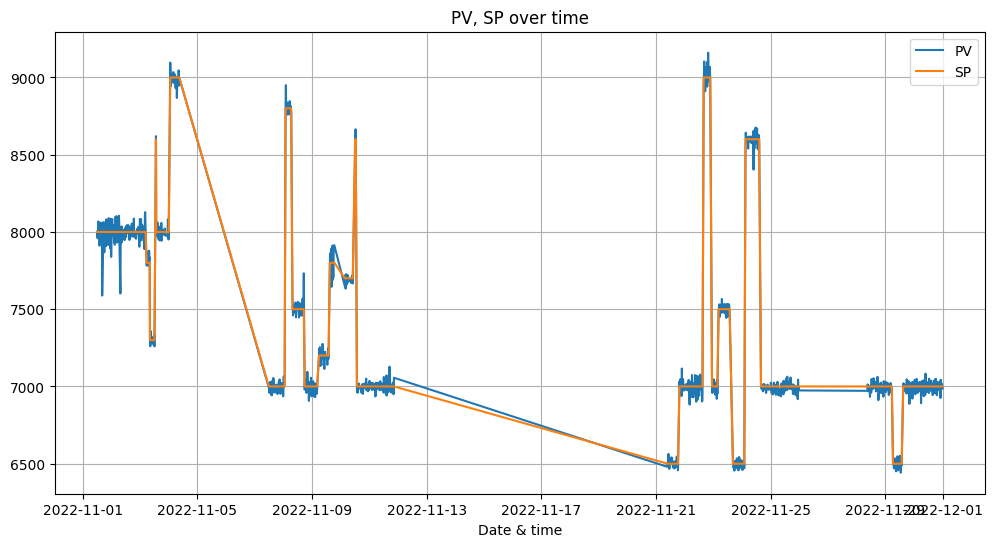

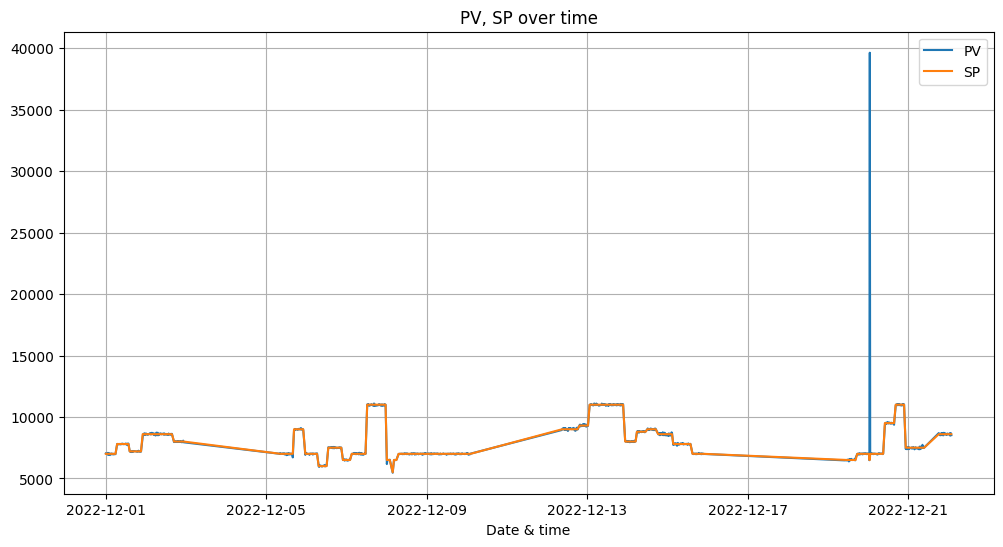

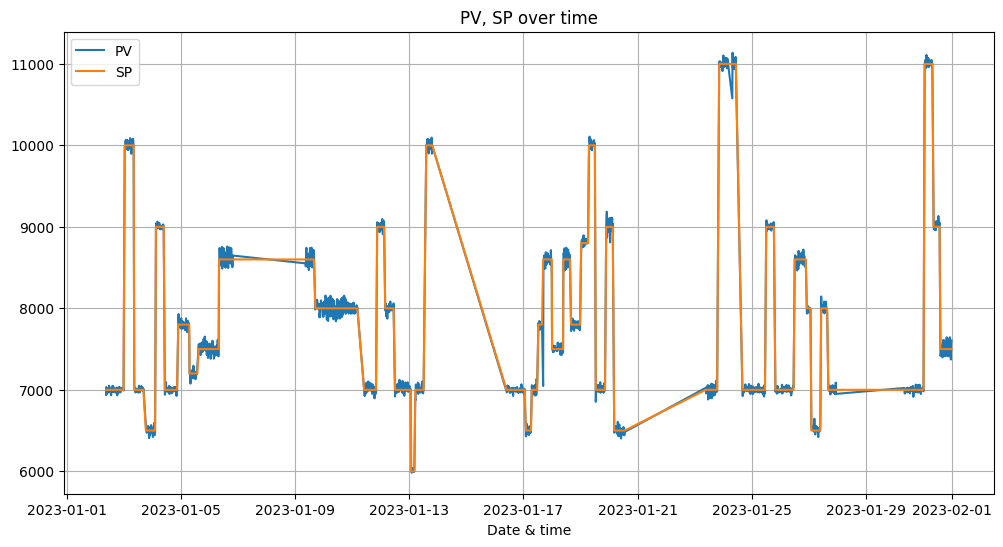

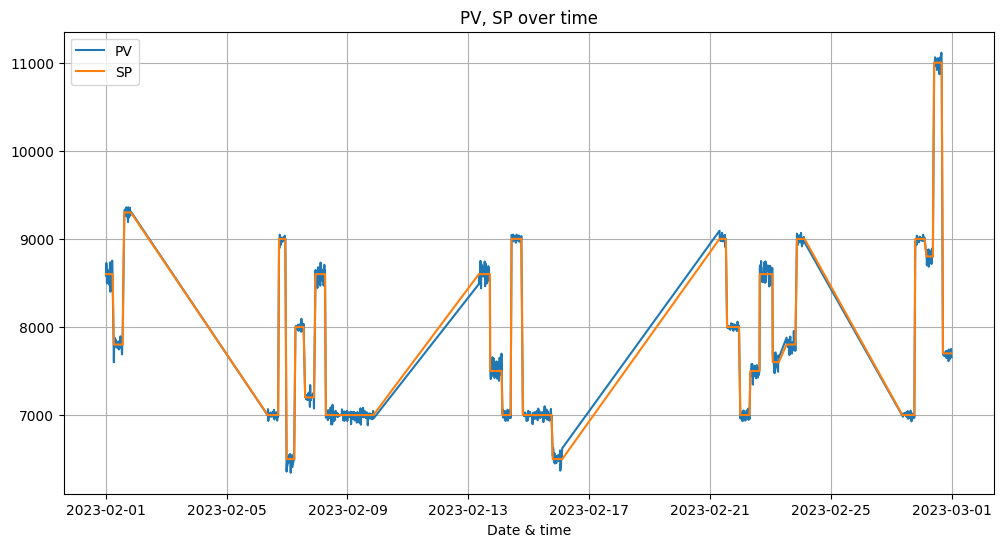

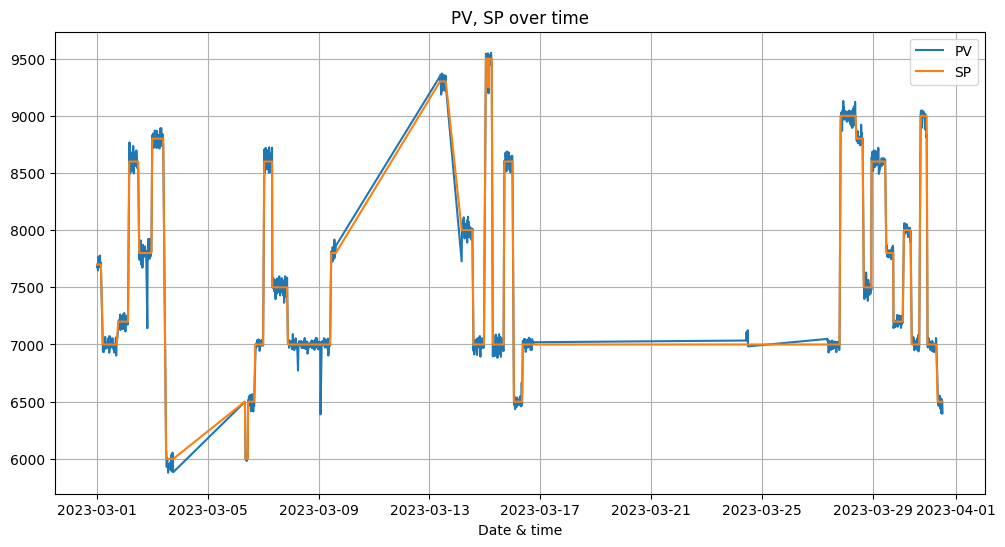

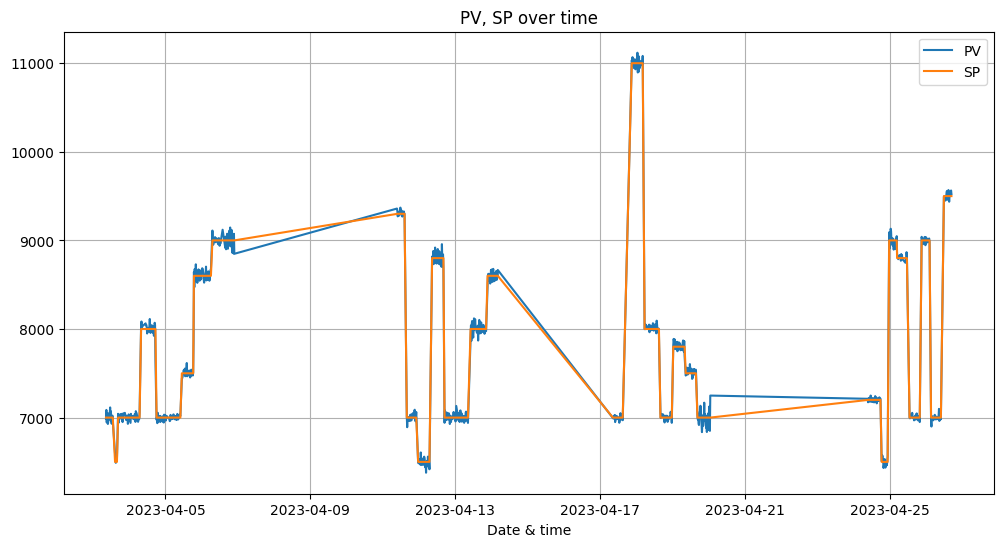

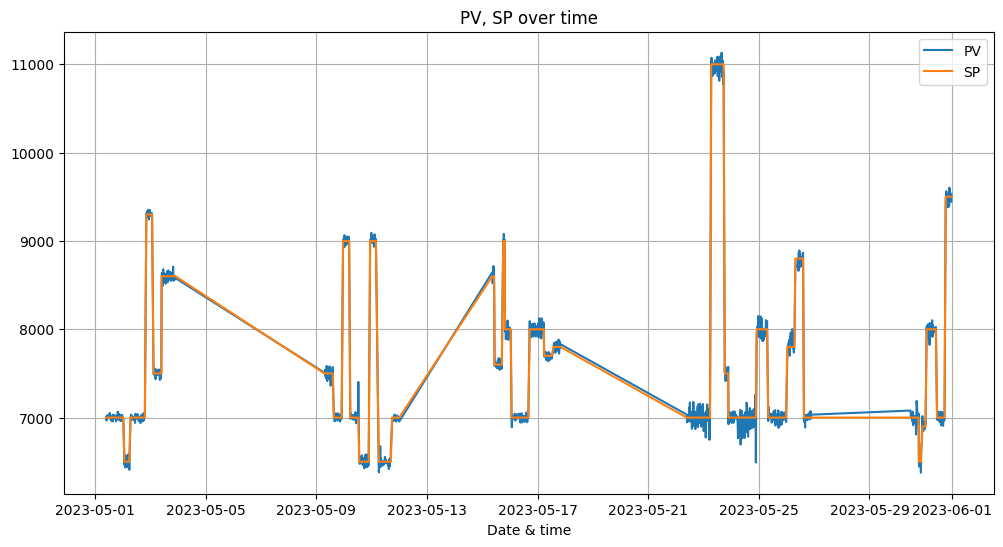

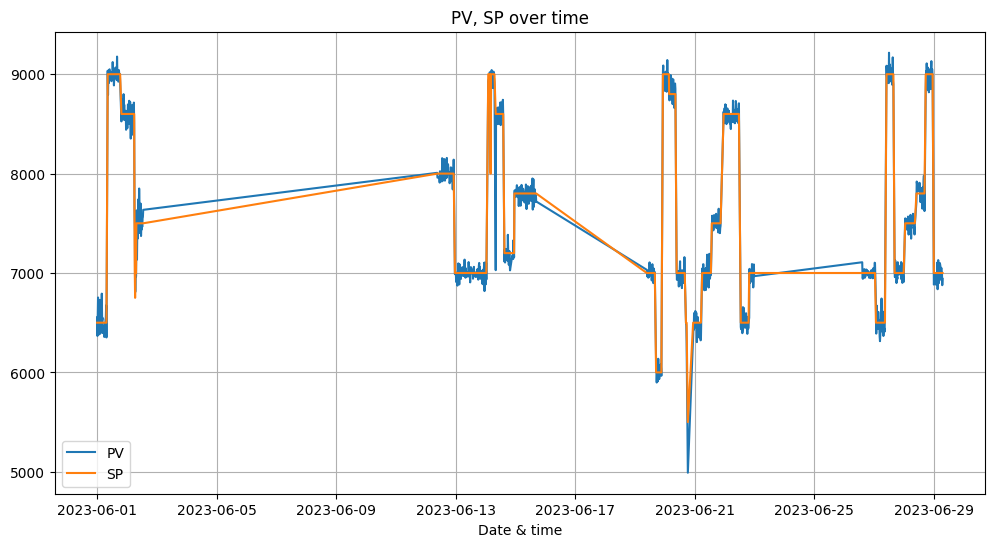

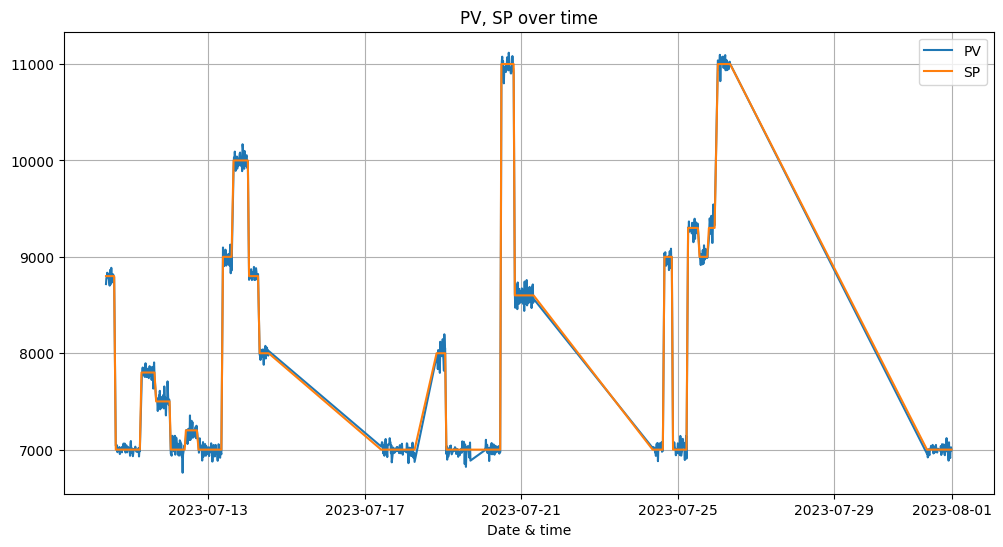

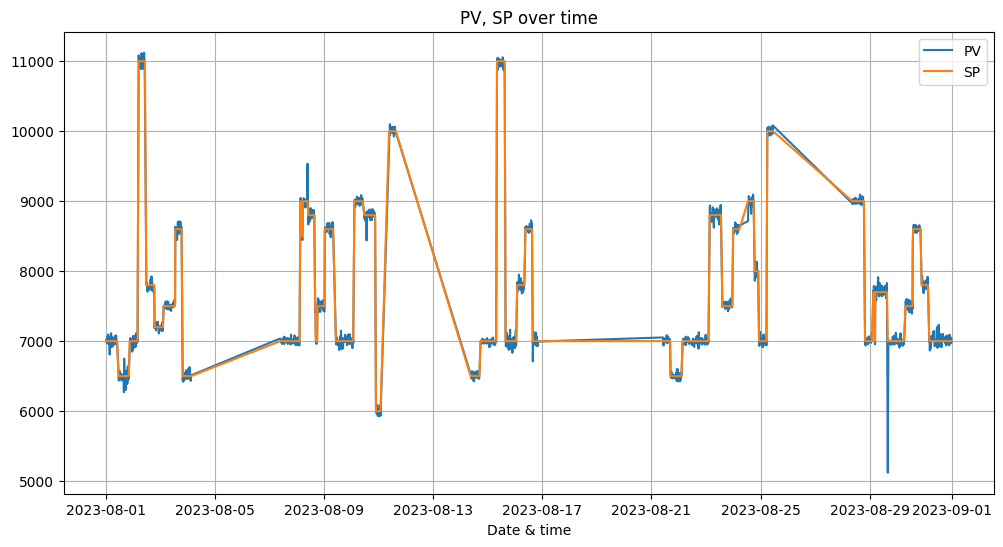

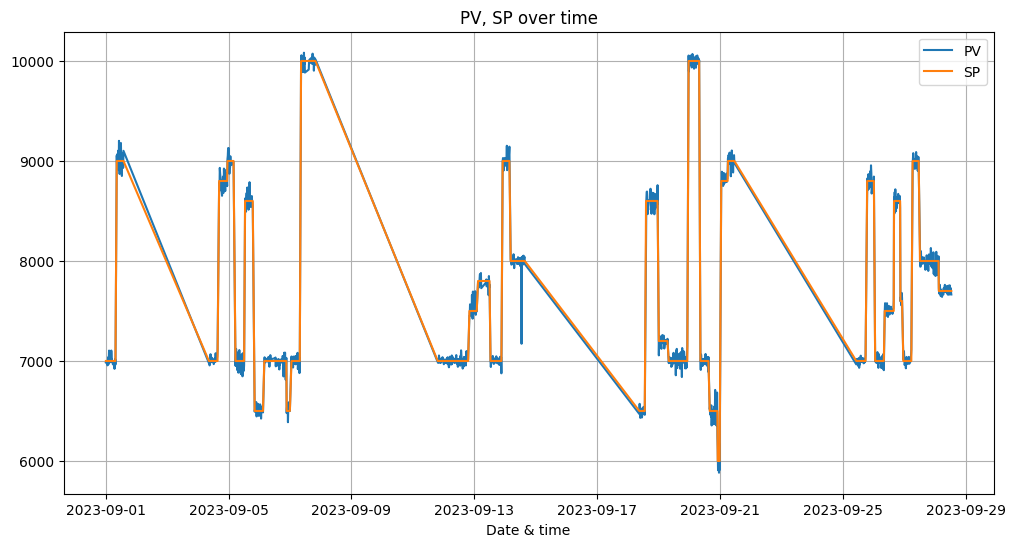

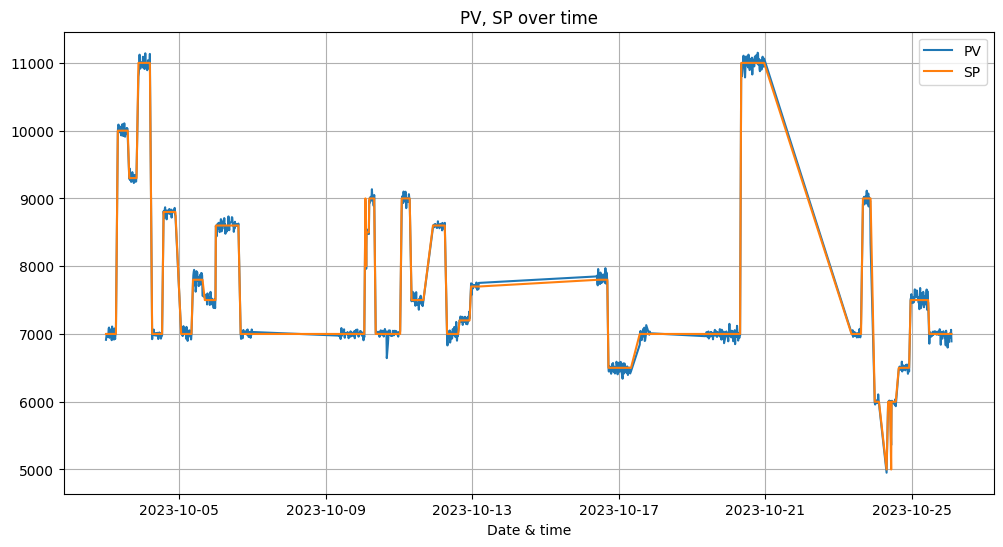

In [27]:
g = df.groupby(pd.Grouper(key='DateTime', freq='m'))
dfs = [group for _,group in g]

for i in range(0, len(dfs)):
	plt.figure(figsize=(12,6))
	plt.plot(dfs[i].DateTime, dfs[i].PV, label = "PV");
	plt.plot(dfs[i].DateTime, dfs[i].SP, label = "SP");
	plt.legend()
	plt.grid()
	plt.xlabel('Date & time')
	plt.title('PV, SP over time')
	plt.show()